# Tutorial 4

Let's import some libraries...

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## The order of a numerical method

Last week, we came across the explicit Euler, and the Euler-A and Euler-B methods. These are first-order methods, while the Störmer-Verlet is a second-order method. The "order" here refers to [order of accuracy](https://en.wikipedia.org/wiki/Order_of_accuracy) of the numerical method.

We saw that for the Euler-A and Euler-B methods, a step size of $\Delta t=0.1$ is unable to reproduce the theoretical phase space diagram. The example phase space plot for the Euler-A method is provided below:

<center><img src="./img/euler_a_ps.png" style="width: 300px;" /></center>

On the other hand, if we were decrease the time step-size to $\Delta t=0.01$, i.e. to run our problem at a higher resolution, our numerical solution is able to better reproduce the theoretical phase space diagram:

<center><img src="./img/euler_a_ps_small_ts.png" style="width: 300px;" /></center>

This observation is related to the order of the numerical method. Loosely speaking, the order of a numerical method tells us the answer to the question:

    How much improvement can I get from the numerical method if I were to increase the resolution of my problem? 
    
Mathematically, if we have a numerical solution $u_h$ and an exact solution $u$, then a $n$-th order numerical method gives us

$$\Vert u_h - u \Vert = \mathcal{O}(h^n), \tag{1}$$

where $h$ is our step size, e.g. $\Delta t$ above.

## A simple example

Now let us develop an intuition of the order of accuracy of a numerical method with our harmonic oscillator problem. We pick the Euler-A method, and the literature tells us that this is a first-order method. Can we verify this?

First of all, taking the log on both sides of equation (1) above and rearraging gives us

$$\frac{\log(\Vert u_h - u \Vert)}{\log( h )} \sim n.$$

Let's try to code this up...

[1e-05, 0.0001, 0.001, 0.01, 0.1]
<class 'list'>
<class 'numpy.ndarray'>
[1.21732153 1.12041156 1.15050957 1.20061426 1.29994154 1.5797836 ]
[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]


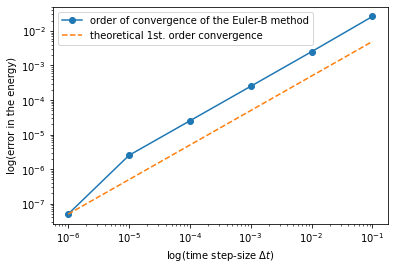

In [4]:
# First, we need a set of time-step sizes (dt) to test our problem.
# Now we note that the dts array is a Python list.
dts = [0.000001,0.00001,0.0001,0.001,0.01,0.1]
dts_new = [(10**(n-5)) for n in range(5)]
print(dts_new)

# Then we want to code a function for the Euler-B method,
# so that we can reuse the code for each dt.
def euler_b(xb,vb,dt,Nt):
    for idx in range(Nt):
        vb[idx+1] = vb[idx] - dt * xb[idx]
        xb[idx+1] = xb[idx] + dt * vb[idx+1]
        
    energy = 0.5 * xb**2 + 0.5 * vb**2
    return xb, vb, energy

# Now let's define the number of time steps and
# an array to store our results.
err = []
Nt = 100000

# a for-loop to loop through the dt's
for dt in dts:
    # and for each dt, we have to redefine the 
    # solution arrays and the initial condition.
    xb = np.zeros((Nt+1))
    vb = np.zeros((Nt+1))
    vb[0] = 1.0
    
    # Because dt changes, recompute the time
    t = np.arange(Nt+1)*dt

    # and we also recompute the exact solutions
    xth = np.sin(t)
    vth = np.cos(t)
    eth = 0.5*xth**2 + 0.5*vth**2
    
    # we obtain the solution for the 
    _, _, energy = euler_b(xb,vb,dt,Nt)
    
    # to compute the error in the numerical solution,
    # we use the max. norm.
    err_in_energy = np.abs(energy - eth).max()
    
    # we store the error we computed
    err.append(err_in_energy)
    
# note that both dts and err are Python lists.
print(type(dts))
# but let's do something cool...
print(type(np.log(dts)))

# now we can compute equation (2) above to obtain
# as estimate for n.
print(np.log(err) / np.log(dts))

# what does first-order convergence actually means?
# let's implement our theoretical understanding.
err_th = [ (10**expn)**1.0 for expn in range(len(dts)) ]
print(err_th)
# we can do better...
err_th = np.array(err_th) * err[0]

plt.figure()
plt.loglog(dts, err, '-o', label='order of convergence of the Euler-B method')
plt.loglog(dts, err_th, '--', label='theoretical 1st. order convergence')
plt.loglog()
plt.ylabel(r"log(error in the energy)")
plt.xlabel(r"log(time step-size $\Delta t$)")
plt.legend()
plt.show()

In [36]:
%%timeit
a = []
for i in range(10000):
    a.append(i)

456 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
%%timeit
b = np.array([])
for i in range(1000):
    b = np.append(b, i)

3.78 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
%%timeit
b = np.zeros((10000))
for i in range(10000):
    b[i] = i

721 µs ± 9.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%%timeit
b = [0] * 10000
for i in range(10000):
    b[i] = i

307 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Local vs global truncation error

Quoting [Wikipedia](https://en.wikipedia.org/wiki/Truncation_error_(numerical_integration)) as usual, 

"Truncation errors in numerical integration are of two kinds:"
  - local truncation errors – the error caused by one iteration, and
  - global truncation errors – the cumulative error caused by many iterations.

Above, we computed the global truncation error which is normally what gives us the order of a numerical method. However, let's repeat our experiment with fewer number of time-steps, say 10. What happens now? 

## Exercise 1
1. Do a error convergence study for the Störmer-Verlet method. Try with say 100,000 time-steps. Do your results verify that the method is indeed second-order?
2. Re-run the study with 10 time-steps. Now what is the order of convergence? Can you explain why? (Hint: This [Wikipedia page](https://en.wikipedia.org/wiki/Verlet_integration#Error_terms) may be helpful.)